In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

raw_data = pd.read_csv("C:\\hmm\\dps\\raw_data.csv", usecols= ['MONATSZAHL', 'AUSPRAEGUNG', 'JAHR', 'MONAT', 'WERT'])
def data_prep(*args):
    df_filtered = raw_data[raw_data['JAHR'] <= 2020]
    df_data = df_filtered.copy()
    df_filtered['MONAT'] = pd.to_datetime(df_filtered['MONAT'],format = '%Y%m')
    df_filtered.rename(columns = {'MONAT':'Time'},inplace = True)
    df_filtered.set_index(df_filtered['Time'],inplace = True)
    df_filtered.drop(columns = ['JAHR','Time'], inplace = True)
    df_filtered.sort_index(inplace = True)
    return df_filtered


C:\Users\THARINI\AppData\Local\Temp\ipykernel_18008\470252825.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['MONAT'] = pd.to_datetime(df_filtered['MONAT'],format = '%Y%m')
C:\Users\THARINI\AppData\Local\Temp\ipykernel_18008\470252825.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.rename(columns = {'MONAT':'Time'},inplace = True)
C:\Users\THARINI\AppData\Local\Temp\ipykernel_18008\470252825.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: ht

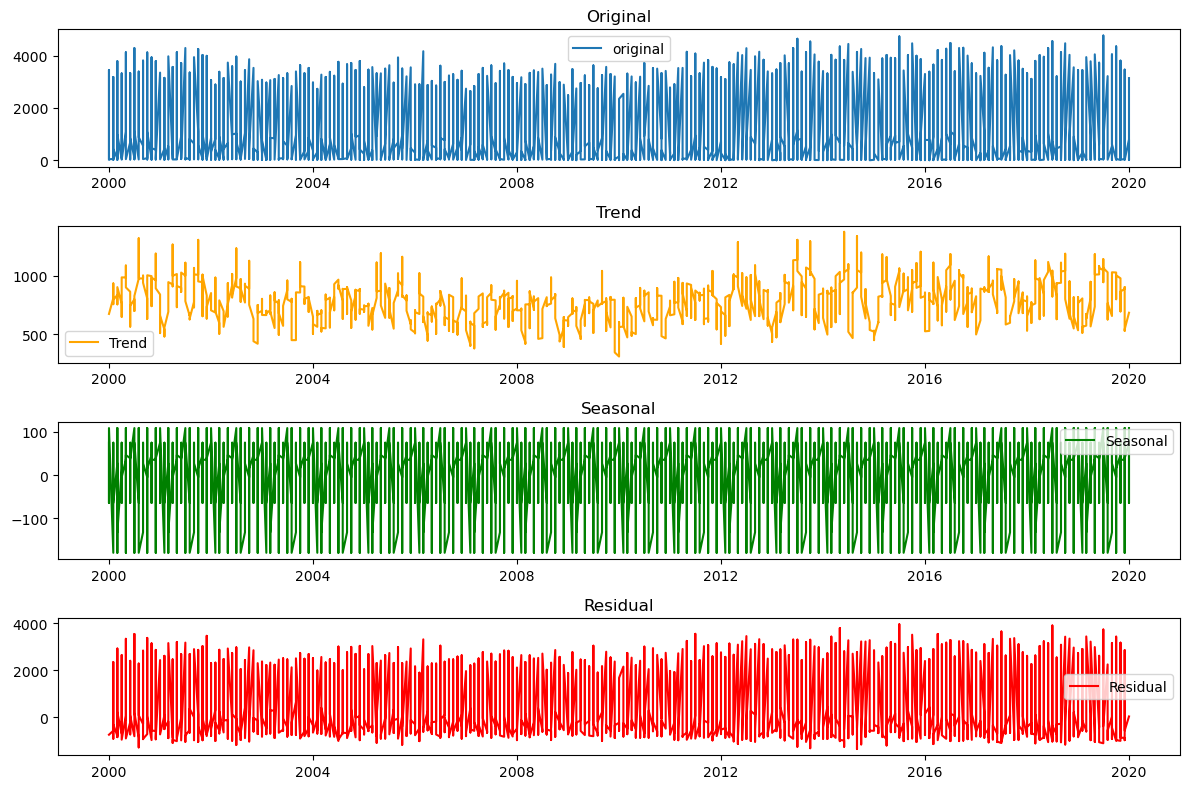

In [2]:
# data plot
df_filtered = data_prep(raw_data)
df_result = seasonal_decompose(df_filtered['WERT'].loc['2000-01-01':'2020-01-01'], model='additive', period=12)

plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(df_filtered['WERT'].loc['2000-01-01':'2020-01-01'], label='original')
plt.title('Original')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(df_result.trend, label='Trend', color='orange')
plt.title('Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(df_result.seasonal, label='Seasonal', color='green')
plt.title('Seasonal')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(df_result.resid, label='Residual', color='red')
plt.title('Residual')
plt.legend()

plt.tight_layout()
plt.show()

In [3]:
# Stationary check 
from statsmodels.tsa.stattools import adfuller
df_stationary_check = df_filtered['WERT'].values
result = adfuller(df_stationary_check)
result
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -20.456866
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
